<a href="https://colab.research.google.com/github/JonathanAHerrera/fAIshon/blob/main/FashionTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#Mount Drive
#!pip install matplotlib
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Replace 'path_to_your_zipped_file.zip' with the path to your zip file
# Replace 'path_to_destination_directory' with the path where you want to extract the files
# !unzip /content/drive/MyDrive/DeepFashionDataset/segm.zip -d /content/drive/MyDrive/DeepFashionDataset/UnzippedFiles


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
#Load datasets and rename columns
shapeDf = pd.read_csv('/content/drive/MyDrive/DeepFashionDataset/UnzippedFiles/labels/shape/shape_anno_all.txt', sep=" ", header=None)
shapeDf.columns = ['fileName', 'sleeveLength', 'lowerClothingLength', 'socks', 'hat', 'glasses', 'neckwear', 'wristWearing', 'ring', 'waistAccessories', 'neckline', 'isOuterClothingCardigan', 'isUpperClothingCoveringNaval']

fabricDf = pd.read_csv('/content/drive/MyDrive/DeepFashionDataset/UnzippedFiles/labels/texture/fabric_ann.txt', sep=" ", header=None)
fabricDf.columns = ['fileName', 'upperFabric', 'lowerFabric', 'outerFabric']

patternDf = pd.read_csv('/content/drive/MyDrive/DeepFashionDataset/UnzippedFiles/labels/texture/pattern_ann.txt', sep=" ", header=None)
patternDf.columns = ['fileName', 'upperPattern', 'lowerPattern', 'outerPattern']

In [4]:
#Define Class Variables
class shape:
  class sleeveLength:
    SLEEVELESS = 0
    SHORT_SLEEVE = 1
    MEDIUM_SLEEVE = 2
    LONG_SLEEVE = 3
    NOT_LONG_SLEEVE = 4
    NA = 5
  class lowerClothingLength:
    THREE_POINT = 0
    MEDIUM_SHORT = 1
    THREE_QUARTER = 2
    LONG = 3
    NA = 4
  class socks:
    NO = 0
    SOCKS = 1
    LEGGINGS = 2
    NA = 3
  class hat:
    NO = 0
    YES = 1
    NA = 2
  class glasses:
    NO = 0
    EYEGLASSES = 1
    SUNGLASSES = 2
    HAVE_A_GLASSES_IN_HAND_OR_CLOTHES = 3
    NA = 4
  class neckwear:
    NO = 0
    YES = 1
    NA = 2
  class wristWearing:
    NO = 0
    YES = 1
    NA = 2
  class ring:
    NO = 0
    YES = 1
    NA = 2
  class waistAccessories:
    NO = 0
    BELT = 1
    HAVE_A_CLOTHING = 2
    HIDDEN = 3
    NA = 4
  class neckline:
    V_SHAPE = 0
    SQUARE = 1
    ROUND = 2
    STANDING = 3
    HIPS = 4
    SUSPENDERS = 5
    NA = 6
  class outerClothingCardigan:
    YES = 0
    NO = 1
    NA = 2
  class upperClothingCoveringNaval:
    NO = 0
    YES = 1
    NA = 2

class fabric:
  DENIM = 0
  COTTON = 1
  LEATHER = 2
  FURRY = 3
  KNITTED = 4
  CHIFFON = 5
  OTHER = 6
  NA = 7

class pattern:
  FLORAL = 0
  GRAPHIC = 1
  STRIPED = 2
  PURE = 3
  LATTICE = 4
  PTHER = 5
  COLOR_BLOCK = 6
  NA = 7


In [5]:
print(shapeDf.shape)
print(fabricDf.shape)
print(patternDf.shape)
print(shape.sleeveLength.LONG_SLEEVE)

(42544, 13)
(44096, 4)
(44096, 4)
3


In [52]:
mergedFashionDatasetDf = pd.merge(shapeDf, fabricDf, on='fileName')
mergedFashionDatasetDf = pd.merge(mergedFashionDatasetDf, patternDf, on='fileName')
mergedFashionDatasetDf['gender'] = mergedFashionDatasetDf['fileName'].apply(lambda x: 1 if 'WOMEN' in x else 0)

In [53]:
print(mergedFashionDatasetDf.head())

                                    fileName  sleeveLength  \
0  MEN-Denim-id_00000080-01_7_additional.jpg             5   
1  MEN-Denim-id_00000089-01_7_additional.jpg             0   
2  MEN-Denim-id_00000089-02_7_additional.jpg             3   
3  MEN-Denim-id_00000089-03_7_additional.jpg             1   
4  MEN-Denim-id_00000089-04_7_additional.jpg             3   

   lowerClothingLength  socks  hat  glasses  neckwear  wristWearing  ring  \
0                    3      0    0        0         0             0     0   
1                    3      0    0        0         0             0     0   
2                    3      0    0        0         0             0     0   
3                    3      0    0        0         0             0     0   
4                    3      0    0        0         0             0     0   

   waistAccessories  neckline  isOuterClothingCardigan  \
0                 3         2                        1   
1                 3         2                   

In [1]:
searchParams = {
    'sleeveLength': shape.sleeveLength.LONG_SLEEVE,
    'lowerClothingLength': -1,
    'socks': -1,
    'hat': -1,
    'glasses': -1,
    'neckwear': -1,
    'wristWearing': -1,
    'ring': -1,
    'waistAccessories': -1,
    'neckline': -1,
    'isOuterClothingCardigan': -1,
    'isUpperClothingCoveringNaval': -1,
    'upperFabric': -1,
    'lowerFabric': -1,
    'outerFabric': -1,
    'upperPattern': -1,
    'lowerPattern': -1,
    'outerPattern': -1
}

condition = pd.Series([True] * len(mergedFashionDatasetDf))

for column, value in searchParams.items():
    if value != -1:
        condition &= (mergedFashionDatasetDf[column] == value)

filteredDf = mergedFashionDatasetDf[condition]

#print(filteredDf)

img = mpimg.imread('/content/drive/MyDrive/DeepFashionDataset/UnzippedFiles/images/' + filteredDf['fileName'].iloc[0]) #Replace "image.jpg" with the path of your image
plt.imshow(img)
plt.axis('off')
plt.show()


NameError: name 'shape' is not defined

0    WOMEN-Tees_Tanks-id_00006242-24_7_additional.jpg
1             WOMEN-Dresses-id_00007031-02_2_side.jpg
2         MEN-Shirts_Polos-id_00005557-03_1_front.jpg
3             WOMEN-Dresses-id_00002549-03_2_side.jpg
4    WOMEN-Tees_Tanks-id_00005370-08_7_additional.jpg
5           WOMEN-Sweaters-id_00001255-02_1_front.jpg
6      WOMEN-Sweaters-id_00003279-01_7_additional.jpg
7     WOMEN-Blouses_Shirts-id_00000692-01_1_front.jpg
8            WOMEN-Dresses-id_00006226-01_1_front.jpg
9          WOMEN-Tees_Tanks-id_00002157-02_4_full.jpg
Name: fileName, dtype: object


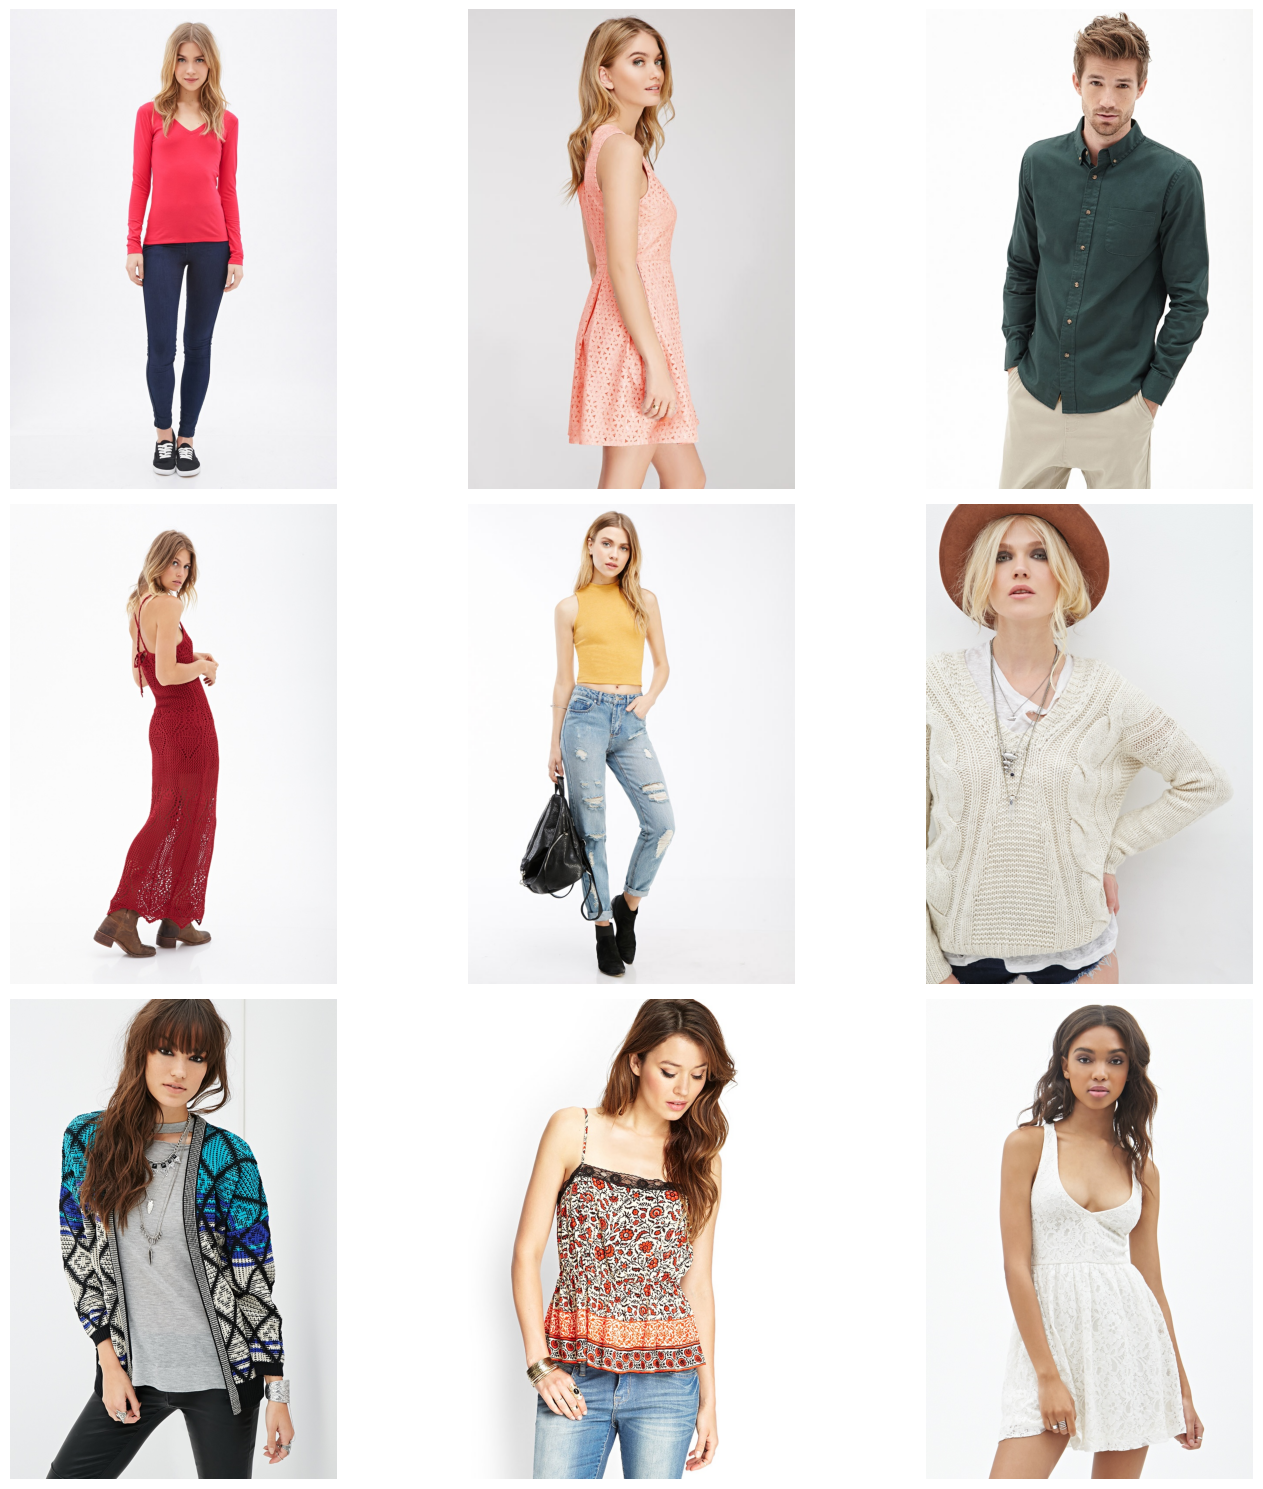

Please enter which image you would like to search by 0-82


In [56]:
import time
randomIndex = [random.randint(0, len(mergedFashionDatasetDf) - 1) for _ in range(10)]
randomDf = mergedFashionDatasetDf.iloc[randomIndex]
randomDf.reset_index(drop=True, inplace=True)
print(randomDf['fileName'])

# Assuming filteredDf contains at least 9 entries with a 'fileName' column
image_paths = randomDf['fileName'].iloc[:9]

# Define the path prefix
path_prefix = '/content/drive/MyDrive/DeepFashionDataset/UnzippedFiles/images/'

# Create a figure and a set of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for ax, image_path in zip(axes, image_paths):
    img = mpimg.imread(path_prefix + image_path)
    ax.imshow(img)
    ax.axis('off')  # Turn off axis

plt.tight_layout()
plt.show()


time.sleep(5)
selectedSource = int(input('Please enter which image you would like to search by 0-8'))
selectedRow = randomDf.iloc[selectedSource]
selectedImage = randomDf['fileName'].iloc[selectedSource]

# img = mpimg.imread('/content/drive/MyDrive/DeepFashionDataset/UnzippedFiles/images/' + selectedImage) #Replace "image.jpg" with the path of your image
# plt.imshow(img)
# plt.axis('off')
# plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

# Assuming selectedRow and mergedFashionDatasetDf are already defined
searchParams = {
    'sleeveLength': -1,
    'lowerClothingLength': selectedRow.lowerClothingLength,
    'socks': -1,
    'hat': -1,
    'glasses': -1,
    'neckwear': -1,
    'wristWearing': selectedRow.wristWearing,
    'ring': selectedRow.ring,
    'waistAccessories': selectedRow.waistAccessories,
    'neckline': selectedRow.neckline,
    'isOuterClothingCardigan': selectedRow.isOuterClothingCardigan,
    'isUpperClothingCoveringNaval': selectedRow.isUpperClothingCoveringNaval,
    'upperFabric': -1,
    'lowerFabric': -1,
    'outerFabric': -1,
    'upperPattern': selectedRow.upperPattern,
    'lowerPattern': selectedRow.lowerPattern,
    'outerPattern': selectedRow.outerPattern
}

condition = pd.Series([True] * len(mergedFashionDatasetDf))

for column, value in searchParams.items():
    if value != -1:
        condition &= (mergedFashionDatasetDf[column] == value)

filteredDf = mergedFashionDatasetDf[condition]

print(filteredDf)

# Display all images in filteredDf
path_prefix = '/content/drive/MyDrive/DeepFashionDataset/UnzippedFiles/images/'
image_paths = filteredDf['fileName'].tolist()

# Calculate the number of rows and columns for the grid
num_images = len(image_paths)
num_cols = 3
num_rows = (num_images // num_cols) + (num_images % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy iteration if it's 2D
if num_rows > 1 or num_cols > 1:
    axes = axes.flatten()
else:
    axes = [axes]

for ax, image_path in zip(axes, image_paths):
    img = mpimg.imread(path_prefix + image_path)
    ax.imshow(img)
    ax.axis('off')  # Turn off axis

# Hide any unused subplots
for i in range(len(image_paths), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [18]:
#calculate similarity
print(filteredDf.iloc[:1,1:].values.reshape(1, -1))
print(filteredDf.iloc[1:2,1:].values.reshape(1, -1))
print(cosine_similarity(filteredDf.iloc[2:3,1:].values.reshape(1, -1), filteredDf.iloc[1:2,1:].values.reshape(1, -1)))

[[1 0 2 1 0 1 0 1 3 2 1 1 1 1 7 1 0 7]]
[[3 0 3 0 0 1 0 1 3 2 1 1 1 1 7 1 0 7]]
[[0.9928579]]


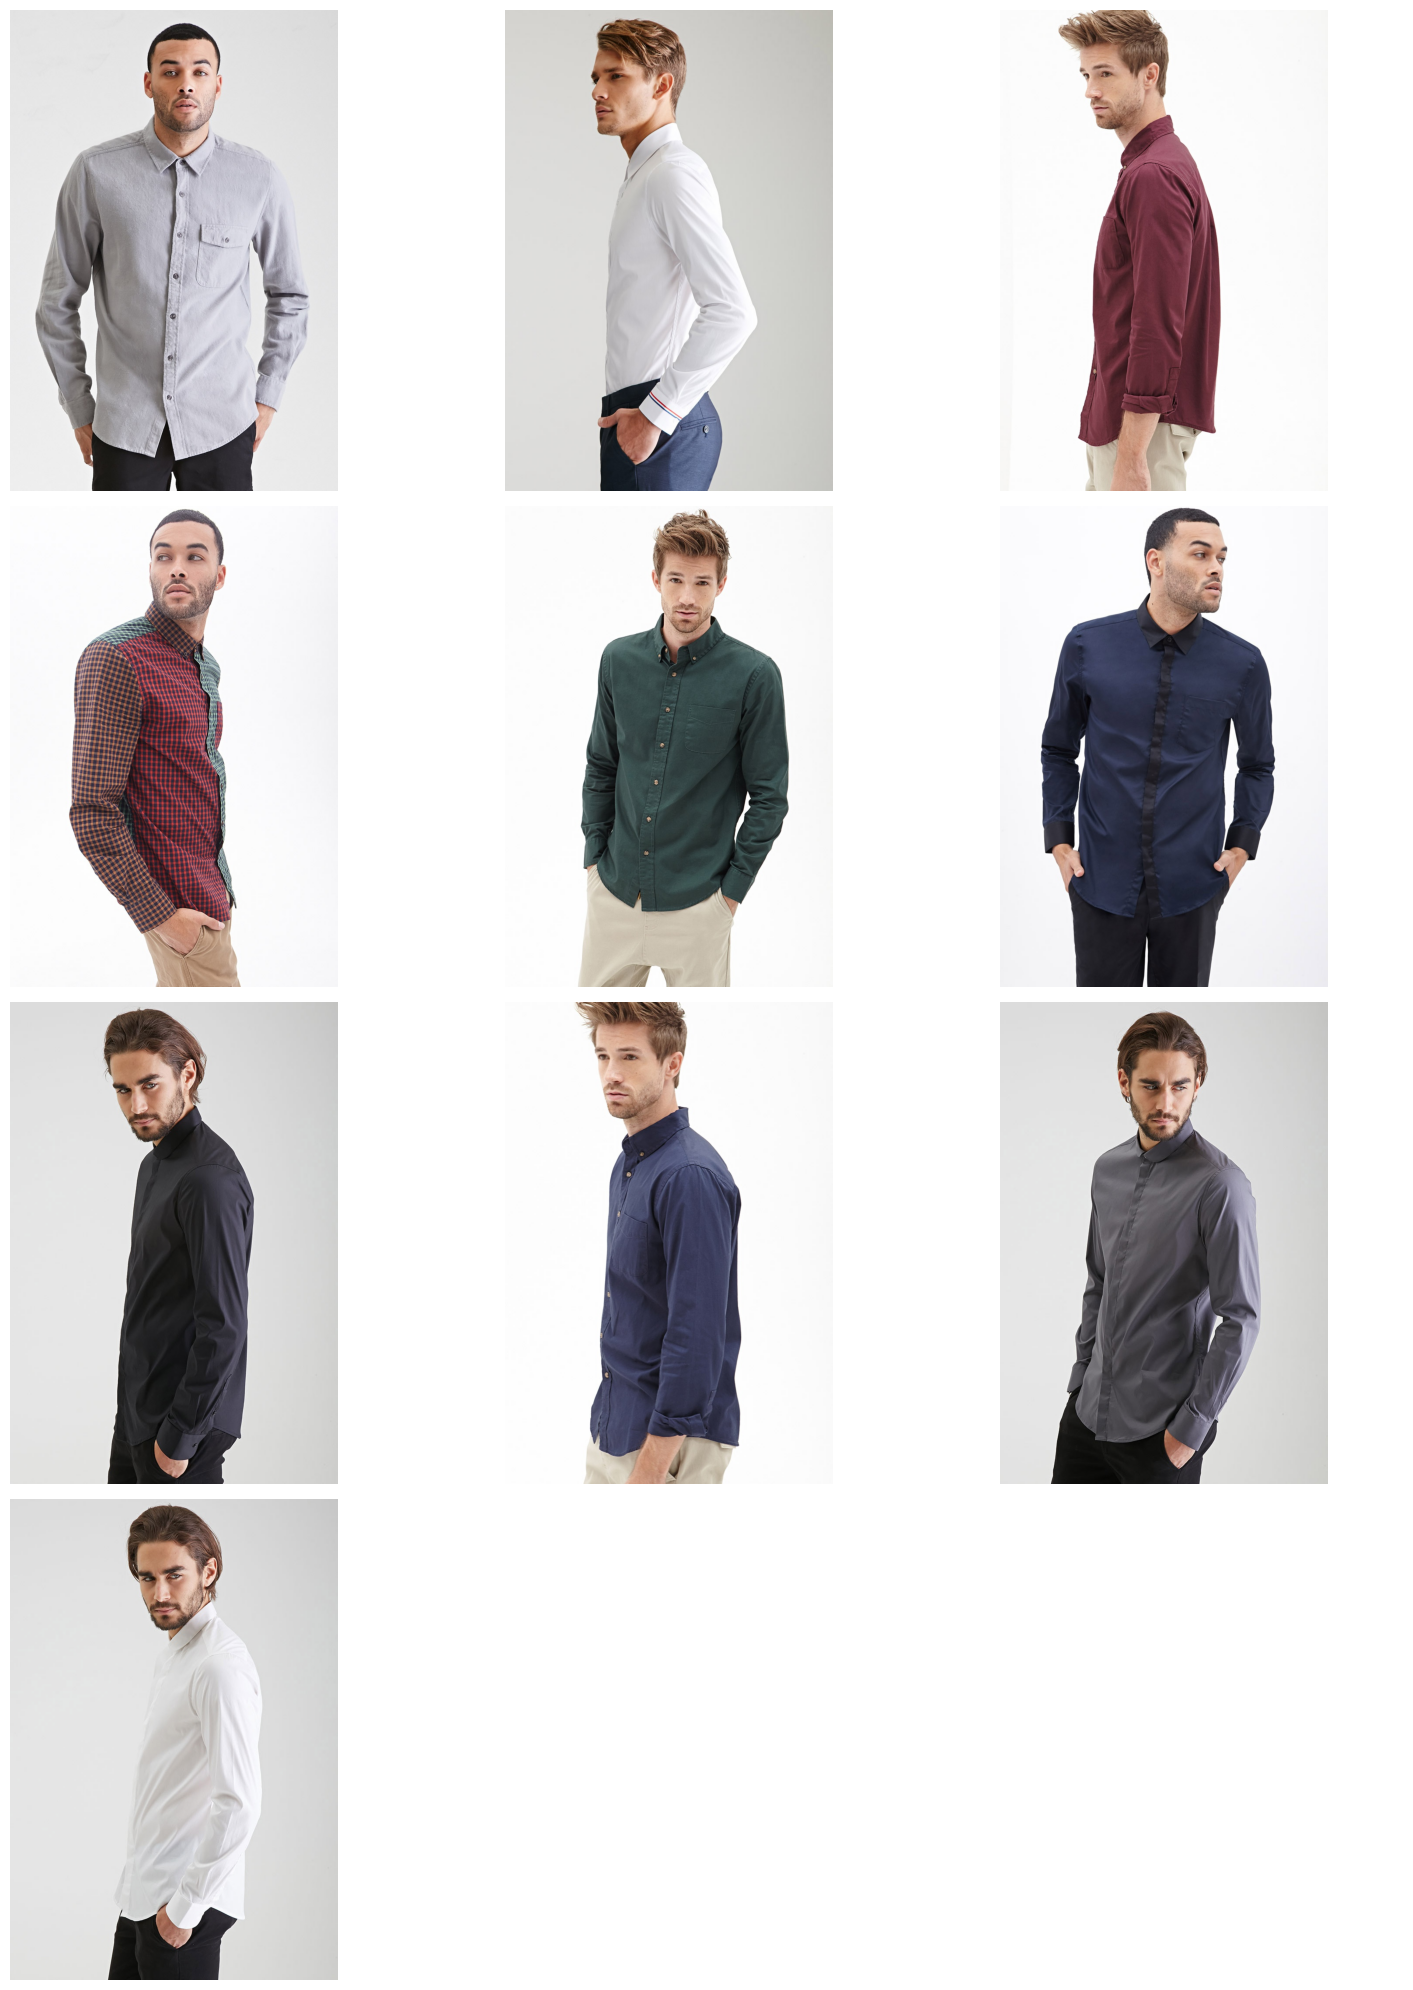

In [57]:

similarityDf = pd.DataFrame(columns=['fileName', 'similarity'])
similarityDf['fileName'] = mergedFashionDatasetDf['fileName']
similarityDf['similarity'] = mergedFashionDatasetDf.apply(lambda row: cosine_similarity(selectedRow.iloc[1:].values.reshape(1, -1), row.iloc[1:].values.reshape(1, -1)), axis=1)
#print(similarityDf.sort_values(by='similarity',ascending=False))

searchResultsDf = similarityDf.sort_values(by='similarity',ascending=False).iloc[0:10]
#print(searchResultsDf)

# Display all images in filteredDf
path_prefix = '/content/drive/MyDrive/DeepFashionDataset/UnzippedFiles/images/'
image_paths = searchResultsDf['fileName'].tolist()

# Calculate the number of rows and columns for the grid
num_images = len(image_paths)
num_cols = 3
num_rows = (num_images // num_cols) + (num_images % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy iteration if it's 2D
if num_rows > 1 or num_cols > 1:
    axes = axes.flatten()
else:
    axes = [axes]

for ax, image_path in zip(axes, image_paths):
    img = mpimg.imread(path_prefix + image_path)
    ax.imshow(img)
    ax.axis('off')  # Turn off axis

# Hide any unused subplots
for i in range(len(image_paths), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()
